## Problem Sheet #8

<br>
### <a href="https://en.wikipedia.org/wiki/Trapezoidal_rule_(differential_equations)">Trapezoidal rule</a>
<br>

<b>Problem 1.</b> Write the Trapezoidal rule's code by using Newton's method with the learned stopping criteria<br><br>

Apply the method to the given problem. Plot the numerical and analytical solutions on the same figure. Measure the global error vector in maximum norm. What can we experience?<br><br>

\begin{cases}
u'(t)= u(t)+t&\\
u(0)=2, &
\end{cases}

The analytical solution is $u(t)=3e^{t}-t-1$.<br><br>


ans =  0.010650


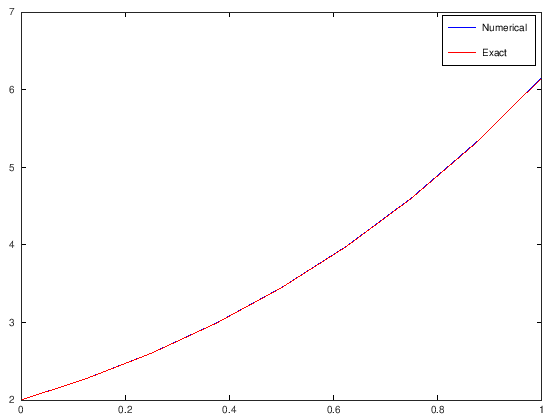

In [4]:
[t,y,it]=trapezoidal(0,1,2,8,1e-10,2);
exact=3*exp(t)-t-1;
plot(t,y,'b',t,exact,'r')
legend('Numerical','Exact')
norm(exact-y,'inf')

<br>

<b>Problem 2.</b> Motivating the stiffness phenomena (<a href="https://en.wikipedia.org/wiki/Stiff_equation">stiff equations</a>) let us consider the IVP

\begin{cases}
u'(t)= -15u(t)& t\in [0,1] \\
u(0)=1 &
\end{cases}

Apply the Explicit Euler method with step-size $h=1/4, 1/8$, the Trapezoidal rule with step-size $h=1/8$. Plot the numerical and analytical solutions on the same figure. What can we experience?<br>

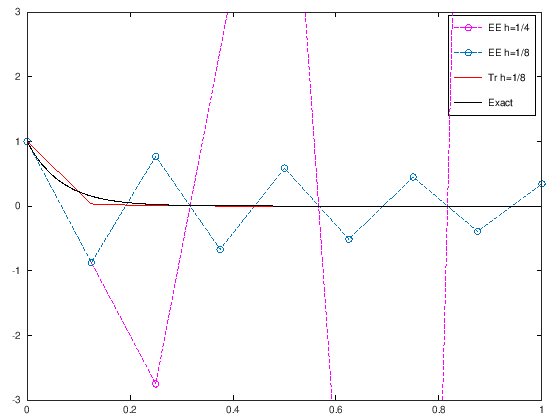

In [5]:
[h,t,y]=expliciteuler(0,1,1,4);
[h1,t1,y1]=expliciteuler(0,1,1,8);
[t2,y2,it]=trapezoidal(0,1,1,8,1e-10,4);
texact=0:0.001:1;
exact=exp(-15*texact);
plot(t,y,'--om',t1,y1,'--o',t2,y2,'r',texact,exact,'k')
legend('EE h=1/4','EE h=1/8', 'Tr h=1/8', 'Exact')
axis([0 1 -3 3])


<br>
### Applying implicit methods to systems
<br>

<b>Problem 3.</b> Modify our Implicit Euler and Trapezoidal rule codes to the system case. Let us consider a classical stiff problem, the so-called Robertson-stiff model<br><br>

\begin{cases}
u_1'(t)=-\alpha u_1(t)+\beta u_2(t)u_3(t)&\\
u_2'(t)=\alpha u_1(t)-\beta u_2(t)u_3(t)-\gamma u_2(t)^2\\
u_3'(t)=\gamma u_2(t)^2&
\end{cases}
<br>
where $\alpha=0.04,\ \beta=10^4,\ \gamma=3\cdot 10^7$ and $y(0)=[1\ 0\ 0]'$. The reaction is evolving until $T=10^6$.<br><br>

Compare our numerical solutions with the <a href="https://www.mathworks.com/help/matlab/ref/ode23s.html">built-in MATLAB solver ode23s</a>.

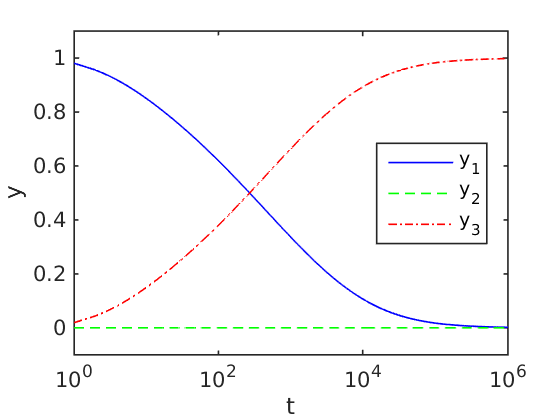

Elapsed time is 17.328633 seconds.


In [1]:
%% Implicit Euler

%a = 0.04; b = 1e+4; c = 3e+7;
%f = [-a*y(1) + b*y(2)*y(3); a*y(1) - b*y(2)*y(3) - c*y(2)*y(2); c*y(2)*y(2)];
%if nargout > 1
%J = zeros(3,3);
%J(1,1) = -a; J(1,2) = b*y(3); J(1,3) = b*y(2);
%J(2,1) = a; J(2,2) = -b*y(3) - 2*c*y(2); J(2,3) = -b*y(2);
%J(3,2) = 2*c*y(2);
%end
tic
[t,y,it]=impeulersys(0,10^6,[1 0 0]',10^6,1e-4,10);
semilogx (t,y(1,:),'b',t,y(2,:),'g--',t,y(3,:),'r-.')
axis([0 1e+6 -0.1 1.1])
legend('y_1','y_2','y_3','Location','East')
xlabel('t')
ylabel('y')
toc

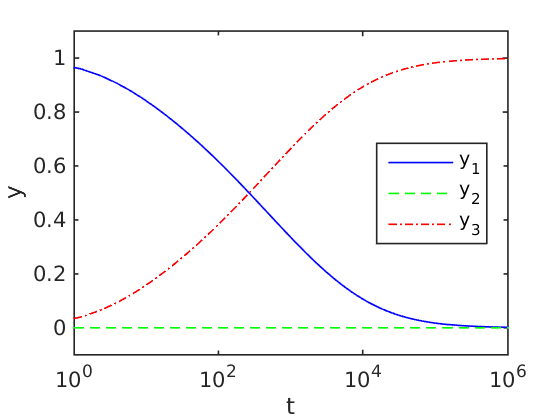

Elapsed time is 0.162191 seconds.


In [3]:
%% Built-in MATLAB solver ode23s
tic
a = 0.04; b = 1e+4; c = 3e+7;
[t,y] = ode23s(@(t,y) [-a*y(1) + b*y(2)*y(3); a*y(1) - b*y(2)*y(3) - c*y(2)*y(2); c*y(2)*y(2)], [0 10^6], [1 0 0]);
semilogx (t,y(:,1),'b',t,y(:,2),'g--',t,y(:,3),'r-.')
axis([1 1e+6 -0.1 1.1])
legend('y_1','y_2','y_3','Location','East')
xlabel('t')
ylabel('y')
toc

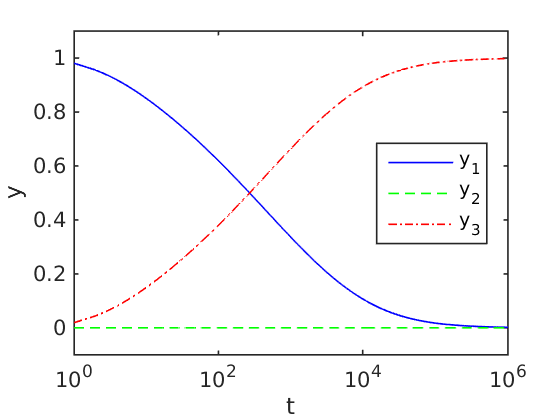

Elapsed time is 19.239527 seconds.


In [1]:
%% Trapezoidal rule

tic
[t,y,it]=trapezsys(0,10^6,[1 0 0]',10^6,1e-4,10);
semilogx (t,y(1,:),'b',t,y(2,:),'g--',t,y(3,:),'r-.')
axis([0 1e+6 -0.1 1.1])
legend('y_1','y_2','y_3','Location','East')
xlabel('t')
ylabel('y')
toc

<br>

<b>Problem 4.</b> Let us apply our Implicit Euler and Trapezoidal rule codes to another classical stiff problem, the so-called <a href="https://en.wikipedia.org/wiki/Van_der_Pol_oscillator">Van der Pol oscillator</a><br><br>

\begin{cases}
u_1'(t)=u_2(t)&\\
u_2'(t)=\mu(1-u_1(t)^2)u_2(t)-u_1(t)&
\end{cases}
<br>

where $\mu=100$ and $y(0)=[2\ 0]'$. The oscillator is evolving until $T=300$.<br><br>

Compare our numerical solutions with the built-in MATLAB solver ode23s.

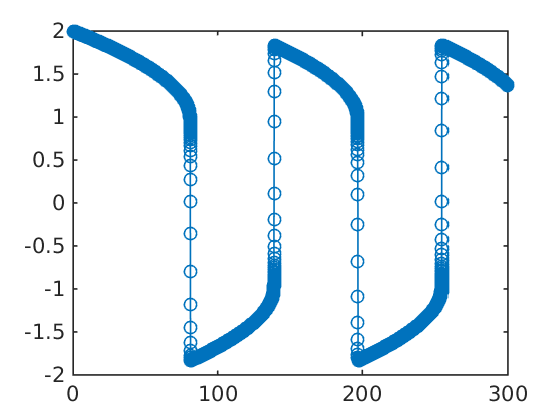

Elapsed time is 1.997149 seconds.


In [2]:
%% Implicit Euler

tic
[t,y,it]=impeulersys(0,300,[2 0]',8*10^4,1e-12,100);
plot(t,y(1,:),'-o')
toc

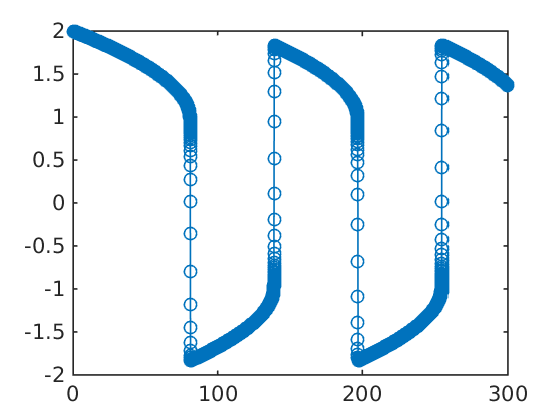

Elapsed time is 2.639744 seconds.


In [3]:
%% Trapezoidal rule

tic
[t,y,it]=trapezsys(0,300,[2 0]',8*10^4,1e-12,100);
plot(t,y(1,:),'-o')
toc

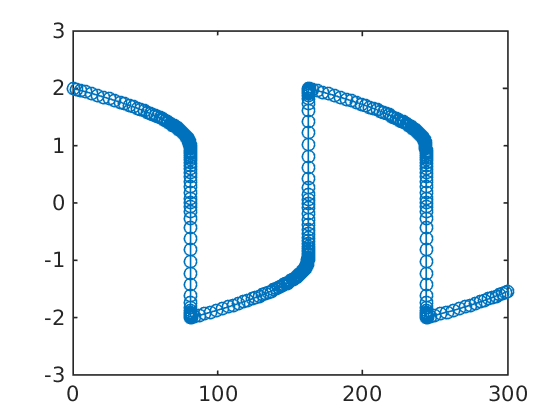

Elapsed time is 0.371806 seconds.


In [4]:
%% Built-in MATLAB solver ode23s

tic
[t,y] = ode23s(@(t,y) [y(2); 100*(1-y(1)^2)*y(2)-y(1)],[0 300],[2 0]);
plot(t,y(:,1),'-o')
toc